# Challenge Chapter 2 Data Science - Binar Academy
- Nama: Frans Gabriel Sianturi
- Kelas: DS 6
- Email: frans.gabriels12@gmail.com

## Import Library dan Load Dataset

In [1]:
# library data manipulasi dan perhitungan
import pandas as pd
import numpy as np

# library visualisasi data
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import seaborn.objects as so

# modul data encoding
from sklearn.preprocessing import OneHotEncoder

# Metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# algoritma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Load Dataset

In [2]:
# loading data train dan test
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

# menampilkan raw data train
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
# menampilkan raw data test
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


## Statistical Analysis & EDA

In [4]:
df_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [5]:
df_test.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [6]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# mengecek tipe data tiap atribut
df_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
df_test.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

Visualisasi churn

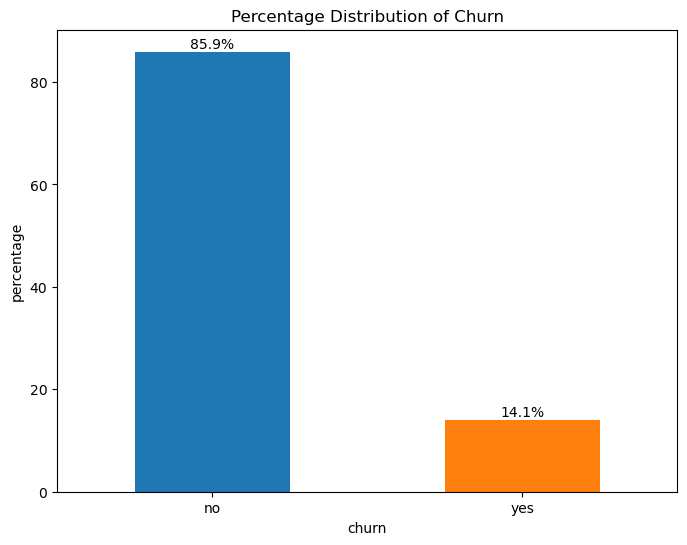

In [71]:
# melihat distribusi attribute dependent dari data training dalam hal ini churn menggunakan
def bar_chart(column, title):
    count = df_train[column].value_counts()
    # menghitung persentase
    percentages = count / count.sum() * 100

    # defenisi warna
    custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    # plot bar chart
    plt.figure(figsize=(8, 6))
    percentages.plot(kind='bar', color=custom_colors)
    plt.xlabel(column)
    plt.ylabel('percentage')
    plt.title(title)
    plt.xticks(rotation=0, ha='center')
    
    # menambahkan label pada bar chart
    for i, percentage in enumerate(percentages):
        plt.annotate(f'{percentage:.1f}%', xy=(i, percentage), ha='center', va='bottom')

    plt.show()
    plt.show()

bar_chart("churn", "Percentage Distribution of Churn")

In [10]:
# mengambil fitur tipe data kategorikal
categorical = list(df_train.select_dtypes(['object']).columns)
categorical

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [11]:
# mengambil fitur tipe data numerikal
numerical = list(df_train.select_dtypes(['float64','int64']).columns)
numerical

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

##### Dampak fitur numerikal pada Churn

In [12]:
# Cek sebaran outliers
i = ['tr'+str(n) for n in range(1,16)] # membuat label pada setiap box plot

fig = make_subplots(rows=5, cols=3, subplot_titles=[f'{col} Box Plot' for col in numerical], vertical_spacing=0.03) # membuat subplot

for index,(col,trace) in enumerate(zip(numerical, i)): # looping fitur numerik
    trace = go.Box(y=df_train[col], boxmean=True, name=col) # membuat box plot pada setiap fitur numerik
    fig.add_trace(trace, row=(index//3)+1, col=(index%3)+1) # menginput box plot sesuai index dari loop

fig.update_layout(height=2000, width=1000, title_text="Cek Sebaran Outlier Pada Fitur Tipe Data Numerikal", showlegend=False) # update subplot
    
fig.show() # menampilkan plot

Korelasi fitur numerikal

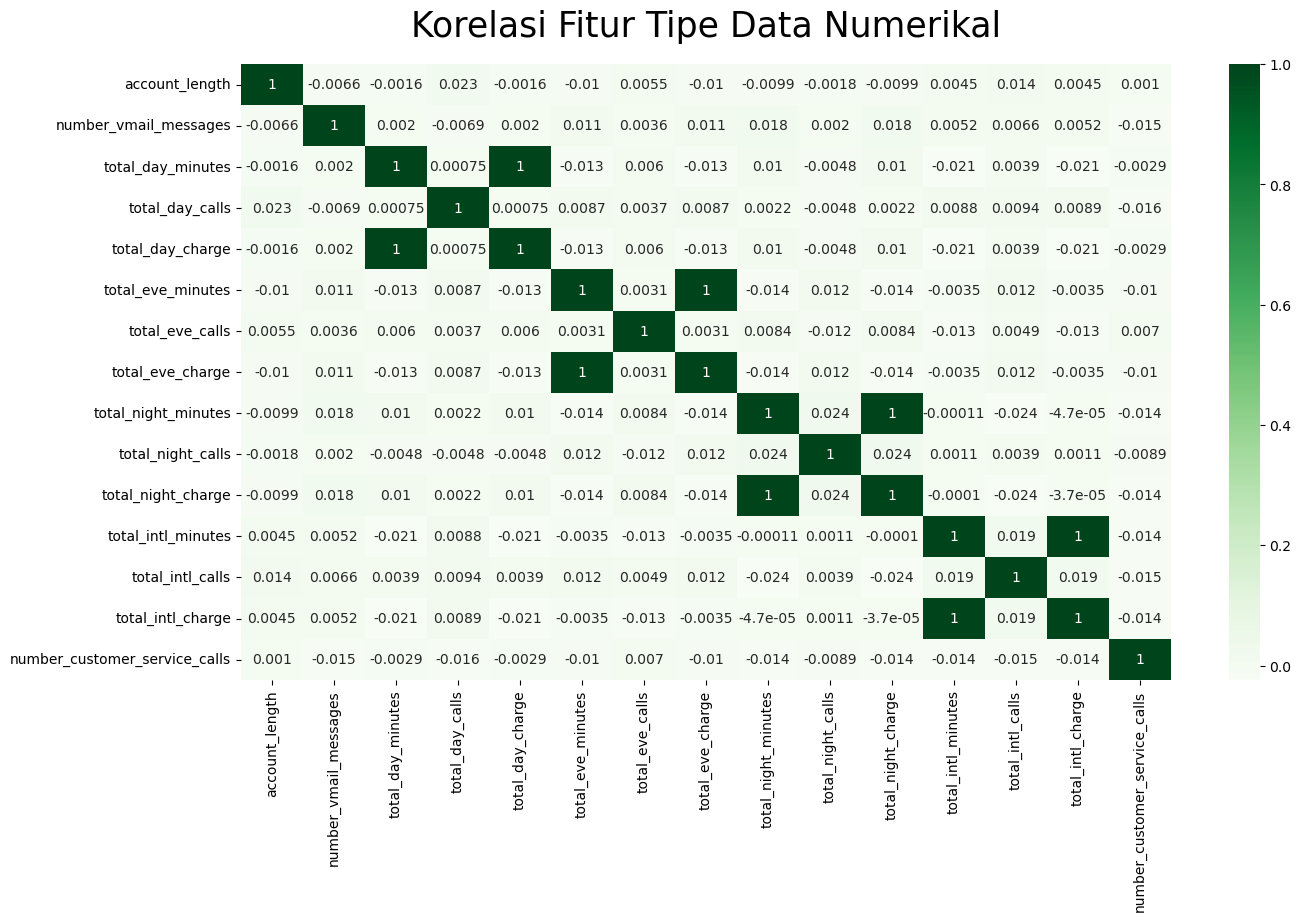

In [13]:
table = df_train[numerical].corr()
plt.figure(figsize=[15,8])
plt.title("Korelasi Fitur Tipe Data Numerikal", size=25, pad=20)
sns.heatmap(table, cmap='Greens', annot=True)
plt.show()

Berdasarkan gambar diatas terlihat bahwa charge dan minutes berkorelasi tinggi

#### Dampak fitur kategorikal pada Churn

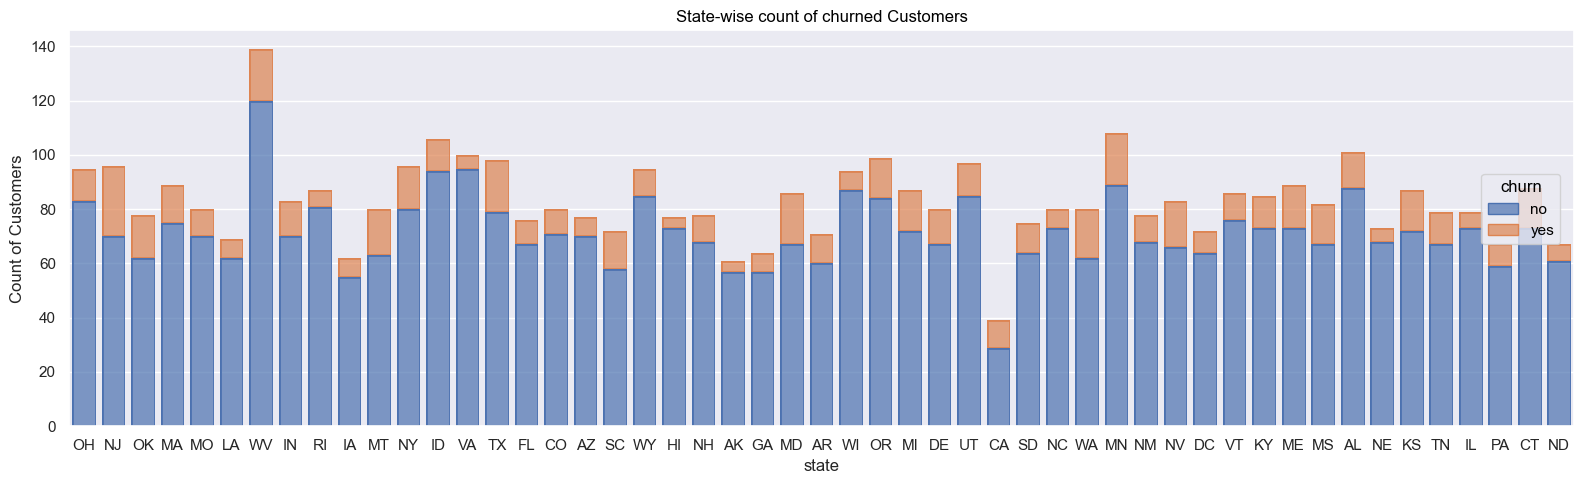

In [14]:
impact = (so.Plot(df_train, x='state', color='churn')
    .add(so.Bar(), so.Count(), so.Stack())
    .layout(size=(16,5))
    .label(title="State-wise count of churned Customers",y="Count of Customers")
)

impact.show()

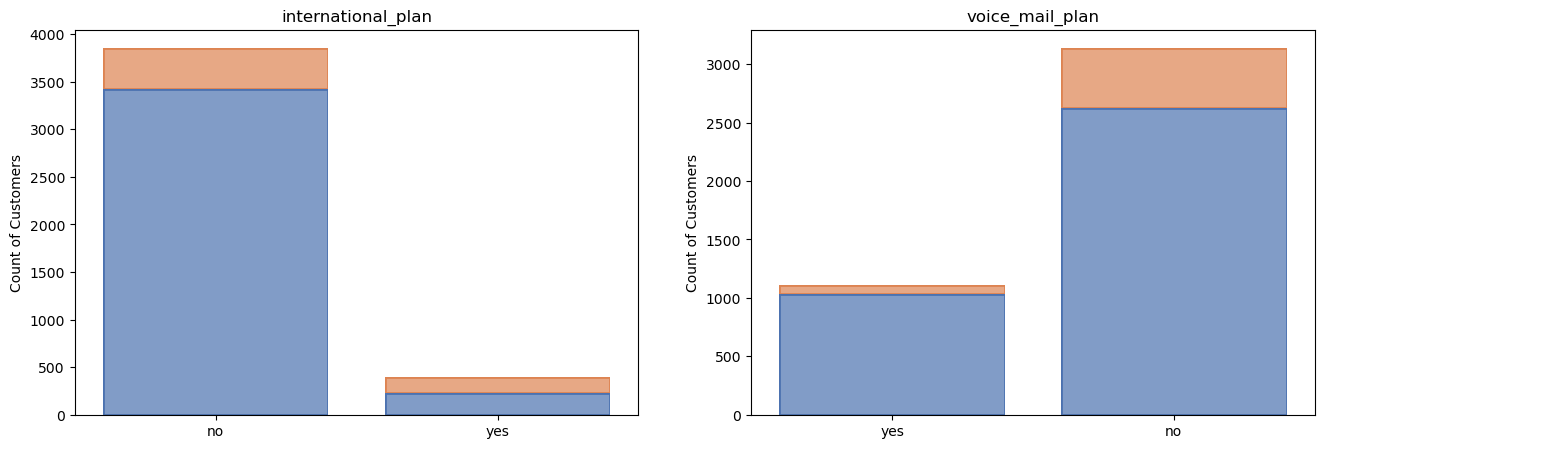

In [15]:
# melihat dampak fitur international_plan dan voice_mail_plan
fig, ax = plt.subplots(1,2,figsize=(16,5))

for col,subplot in zip(categorical[2:-1], ax.flatten()):
    f = (so.Plot(df_train, x=col, color='churn')
        .add(so.Bar(), so.Count(), so.Stack())
        .label(x=" ", y="Count of Customers", title=col)
        .on(subplot).plot()
    )
    
plt.show()

In [16]:
# # drop fitur yang tidak penting untuk latih model
# #df_train = df_train.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'],axis = 1 )
# #df_test = df_test.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'],axis = 1 )
# df_train = df_train.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'],axis = 1 )
# df_test = df_test.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'],axis = 1 )

## Data Pre-processing

In [17]:
# cek missing values data train
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [18]:
# cek missing values data test
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

#### Feature Engineering

In [19]:
# cek outliers menggunakan z-score
def zscore(df, columns, zscores, outliers):
    # plot zscores
    plt.figure(figsize=(8, 4))
    
    # plot histogram zscores
    plt.hist(zscores, bins=30, density=True, alpha=0.6, color='#6b5b95', label='Z-Scores')
     
    # plot kurva bell-shaped
    x = np.linspace(zscores.min(), zscores.max(), 100)
    plt.plot(x, norm.pdf(x), 'g-', label='Bell Curve')
    
    # menambahkan treshold line untuk outliers
    plt.axvline(-3, color='g', linestyle='--', label='Threshold')
    plt.axvline(3, color='g', linestyle='--')

    # highlight outliers
    plt.scatter(outliers, np.zeros_like(outliers), color='red', label='Individual Outliers')
    
    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.title(f'Distribusi z-score {columns} dengan kurva Bell-Shaped')
    
    # Display the count of outliers.
    plt.text(0.02, 0.8, f'Outliers: {len(outliers)} Data', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
    
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
# duplikat data train untuk membuat kolom z-score tanpa mengubah data train original
df_copy = df_train.copy()

#### Penggunaan z-score

zscore account_length

In [21]:
# menghitung z-score account_length menggunakan data train yang telah dicopy
df_copy["zscore"] = (df_copy["account_length"] - df_copy["account_length"].mean())/ df_copy["account_length"].std()
df_copy.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,zscore
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0.170379
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0.926077
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,-0.408990
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,-0.635699
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0.523038


In [22]:
# batasi nilai zscore antara -3 hingga 3
range_outliers = df_copy[(df_copy.zscore<-3) | (df_copy.zscore>3)]
range_outliers

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,zscore
343,DE,224,area_code_510,yes,no,0,171.5,99,29.16,160.0,...,13.60,212.4,102,9.56,5.0,2,1.35,1,yes,3.117601
684,UT,243,area_code_510,no,no,0,95.5,92,16.24,163.7,...,13.91,264.2,118,11.89,6.6,6,1.78,2,no,3.596209
1193,NM,232,area_code_408,no,no,0,165.6,104,28.15,195.9,...,16.65,118.3,77,5.32,11.8,3,3.19,1,no,3.319120
1304,MI,225,area_code_415,no,no,0,165.4,106,28.12,273.7,...,23.26,210.0,93,9.45,8.7,3,2.35,0,yes,3.142791
1472,WY,225,area_code_415,no,no,0,182.7,142,31.06,246.5,...,20.95,218.0,103,9.81,8.8,2,2.38,1,no,3.142791
1593,ID,224,area_code_510,no,no,0,111.4,133,18.94,175.0,...,14.88,217.2,106,9.77,5.5,6,1.49,3,no,3.117601
2725,SD,221,area_code_510,no,yes,24,180.5,85,30.69,224.1,...,19.05,205.7,103,9.26,2.4,3,0.65,0,no,3.042031
3711,TN,222,area_code_408,no,yes,34,218.5,89,37.15,160.7,...,13.66,181.6,76,8.17,4.9,5,1.32,4,no,3.067221
3719,HI,232,area_code_415,no,no,0,248.2,128,42.19,211.2,...,17.95,147.1,117,6.62,10.0,6,2.70,2,no,3.319120
4079,TN,222,area_code_415,no,no,0,256.6,119,43.62,230.8,...,19.62,236.0,97,10.62,12.2,5,3.29,1,yes,3.067221


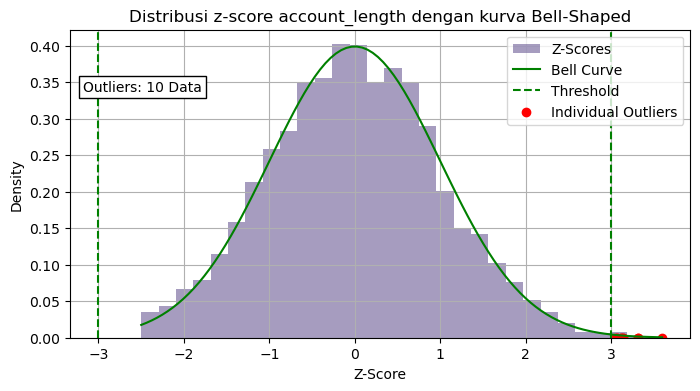

In [23]:
# distribusi zscore dari fitur account_lenght
zscore(df_copy, "account_length", df_copy['zscore'], range_outliers['zscore'])

zscore vmail_messages

In [24]:
# menghitung z-score vmail_messages menggunakan data train yang telah dicopy
df_copy["zscore"] = (df_copy["number_vmail_messages"] - df_copy["number_vmail_messages"].mean())/ df_copy["number_vmail_messages"].std()
df_copy.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,zscore
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,1.366696
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,-0.567845
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,-0.567845
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,-0.567845
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,no,1.217885


In [25]:
# batasi nilai zscore antara -3 hingga 3
vmail_messages_outliers = df_copy[(df_copy.zscore<-3) | (df_copy.zscore>3)]
vmail_messages_outliers

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,zscore
229,SD,144,area_code_408,no,yes,48,189.8,96,32.27,123.4,...,10.49,214.2,106,9.64,6.5,2,1.76,2,yes,3.003615
1346,AR,63,area_code_510,no,yes,49,214.9,86,36.53,198.2,...,16.85,170.8,139,7.69,8.2,5,2.21,0,no,3.078021
2303,WV,137,area_code_510,no,yes,50,186.5,94,31.71,178.0,...,15.13,215.6,100,9.70,12.1,4,3.27,2,no,3.152426
2443,OR,134,area_code_415,no,yes,50,208.8,130,35.50,132.9,...,11.30,136.7,107,6.15,11.1,4,3.00,2,no,3.152426
2979,VA,71,area_code_415,no,yes,49,174.0,122,29.58,168.6,...,14.33,132.1,120,5.94,7.8,4,2.11,1,no,3.078021
3022,FL,133,area_code_408,no,yes,49,229.4,78,39.00,219.5,...,18.66,172.3,115,7.75,12.0,4,3.24,3,no,3.078021
3828,NV,87,area_code_408,no,yes,48,178.8,91,30.40,246.8,...,20.98,262.4,119,11.81,9.0,8,2.43,1,no,3.003615
4000,ME,108,area_code_510,no,yes,48,185.6,125,31.55,224.6,...,19.09,284.7,87,12.81,6.9,3,1.86,1,no,3.003615
4005,UT,118,area_code_408,yes,yes,52,123.7,114,21.03,133.2,...,11.32,191.8,102,8.63,7.9,3,2.13,0,no,3.301237
4061,NY,102,area_code_408,no,yes,48,134.0,83,22.78,234.3,...,19.92,197.3,107,8.88,7.8,4,2.11,6,yes,3.003615


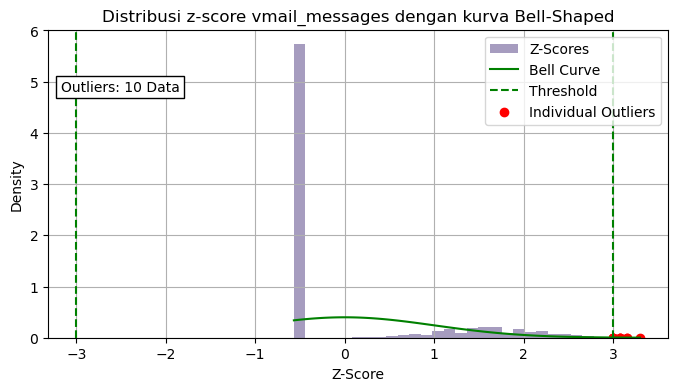

In [26]:
# distribusi zscore dari fitur vmail_messages
zscore(df_copy, "vmail_messages", df_copy['zscore'], vmail_messages_outliers['zscore'])

##### Fitur Encoding

In [27]:
# encoding fitur state menjadi frequency pada data train
frequency = df_train.groupby('state').size()/len(df_train)
frequency.head()

state
AK    0.014353
AL    0.023765
AR    0.016706
AZ    0.018118
CA    0.009176
dtype: float64

In [28]:
# menginputnya ke dalam dataframe
df_train['state'] = df_train.state.map(frequency)
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.022353,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0.022588,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0.022353,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0.018353,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0.020941,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [29]:
# encoding fitur state menjadi frequency pada data test
frequency = df_test.groupby('state').size()/len(df_test)
frequency.head()

state
AK    0.014667
AL    0.030667
AR    0.028000
AZ    0.016000
CA    0.017333
dtype: float64

In [30]:
df_test["state"] = df_test.state.map(frequency)
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,0.016000,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,0.030667,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,0.009333,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,0.020000,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,0.020000,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


encoding fitur area_code menggunakan OHE

In [31]:
ohe = OneHotEncoder()

# OHE area_code pada data train
x = df_train["area_code"].values.reshape(-1,1)
val_train = ohe.fit_transform(x).toarray()

In [32]:
# menetapkan nama fitur pada setiap ohe data train
df_ohe_train = pd.DataFrame(val_train, columns=['is_'+str(ohe.categories_[0][i]) for i in range(len(ohe.categories_[0]))])
df_ohe_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [33]:
# copy kembali data train
df_c = df_train.copy()

In [34]:
df_enc_train = pd.concat([df_ohe_train, df_c],axis=1)
df_enc_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,1.0,0.0,0.022353,107,area_code_415,no,yes,26,161.6,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0.0,1.0,0.0,0.022588,137,area_code_415,no,no,0,243.4,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,1.0,0.0,0.0,0.022353,84,area_code_408,yes,no,0,299.4,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0.0,1.0,0.0,0.018353,75,area_code_415,yes,no,0,166.7,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0.0,0.0,1.0,0.020941,121,area_code_510,no,yes,24,218.2,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [35]:
# drop fitur area_code
df_enc_train.drop("area_code", inplace=True, axis=1)
df_enc_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,1.0,0.0,0.022353,107,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0.0,1.0,0.0,0.022588,137,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,1.0,0.0,0.0,0.022353,84,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0.0,1.0,0.0,0.018353,75,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0.0,0.0,1.0,0.020941,121,no,yes,24,218.2,88,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [36]:
# OHE fitur area_code pada data test
x = df_test["area_code"].values.reshape(-1,1)
val_test = ohe.fit_transform(x).toarray()

In [37]:
# menetapkan nama fitur pada setiap ohe data test
df_ohe_test = pd.DataFrame(val_test, columns=['is_'+str(ohe.categories_[0][i]) for i in range(len(ohe.categories_[0]))])
df_ohe_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [38]:
# copy data test
df_c = df_test.copy()
df_enc_test = pd.concat([df_ohe_test, df_c],axis=1)
df_enc_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,1,0.016000,128,area_code_415,no,yes,25,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0.0,0.0,1.0,2,0.030667,118,area_code_510,yes,no,0,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0.0,1.0,0.0,3,0.009333,62,area_code_415,no,no,0,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0.0,0.0,1.0,4,0.020000,93,area_code_510,no,no,0,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,0.0,1.0,0.0,5,0.020000,174,area_code_415,no,no,0,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [39]:
# drop fitur area_column pada data test
df_enc_test.drop(["area_code","id"], inplace=True,axis=1)
df_enc_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,0.016000,128,no,yes,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0.0,0.0,1.0,0.030667,118,yes,no,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0.0,1.0,0.0,0.009333,62,no,no,0,120.7,70,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0.0,0.0,1.0,0.020000,93,no,no,0,190.7,114,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,0.0,1.0,0.0,0.020000,174,no,no,0,124.3,76,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


Encoding fitur international_plan menggunakan label encoding

In [40]:
international_plan = {"no" : 0, "yes" : 1}
df_enc_train['international_plan'] = df_enc_train['international_plan'].map(international_plan)
df_enc_test['international_plan'] = df_enc_test['international_plan'].map(international_plan)

In [41]:
df_enc_train['international_plan'].value_counts()

0    3854
1     396
Name: international_plan, dtype: int64

In [42]:
df_enc_test['international_plan'].value_counts()

0    673
1     77
Name: international_plan, dtype: int64

Encode voice_mail_plan menggunakan label encoding

In [43]:
voice_mail_plan = {"no" : 0, "yes" : 1}
df_enc_train['voice_mail_plan'] = df_enc_train['voice_mail_plan'].map(voice_mail_plan)
df_enc_test['voice_mail_plan'] = df_enc_test['voice_mail_plan'].map(voice_mail_plan)

In [44]:
df_enc_train['voice_mail_plan'].value_counts()

0    3138
1    1112
Name: voice_mail_plan, dtype: int64

In [45]:
df_enc_test['voice_mail_plan'].value_counts()

0    539
1    211
Name: voice_mail_plan, dtype: int64

In [46]:
df_enc_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,1.0,0.0,0.022353,107,0,1,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0.0,1.0,0.0,0.022588,137,0,0,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,1.0,0.0,0.0,0.022353,84,1,0,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0.0,1.0,0.0,0.018353,75,1,0,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0.0,0.0,1.0,0.020941,121,0,1,24,218.2,88,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [47]:
df_enc_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,0.016000,128,0,1,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0.0,0.0,1.0,0.030667,118,1,0,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0.0,1.0,0.0,0.009333,62,0,0,0,120.7,70,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0.0,0.0,1.0,0.020000,93,0,0,0,190.7,114,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,0.0,1.0,0.0,0.020000,174,0,0,0,124.3,76,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


## Machine Learning Algoritma & Performa Model

##### Normalisasi Data

In [48]:
# nilai minimum pada setiap fitur
numeric_min = df_train[numerical].min().to_dict()
numeric_min

{'account_length': 1.0,
 'number_vmail_messages': 0.0,
 'total_day_minutes': 0.0,
 'total_day_calls': 0.0,
 'total_day_charge': 0.0,
 'total_eve_minutes': 0.0,
 'total_eve_calls': 0.0,
 'total_eve_charge': 0.0,
 'total_night_minutes': 0.0,
 'total_night_calls': 0.0,
 'total_night_charge': 0.0,
 'total_intl_minutes': 0.0,
 'total_intl_calls': 0.0,
 'total_intl_charge': 0.0,
 'number_customer_service_calls': 0.0}

In [49]:
# nilai maksimum pada setiap fitur
numeric_max = df_train[numerical].max().to_dict()
numeric_max

{'account_length': 243.0,
 'number_vmail_messages': 52.0,
 'total_day_minutes': 351.5,
 'total_day_calls': 165.0,
 'total_day_charge': 59.76,
 'total_eve_minutes': 359.3,
 'total_eve_calls': 170.0,
 'total_eve_charge': 30.54,
 'total_night_minutes': 395.0,
 'total_night_calls': 175.0,
 'total_night_charge': 17.77,
 'total_intl_minutes': 20.0,
 'total_intl_calls': 20.0,
 'total_intl_charge': 5.4,
 'number_customer_service_calls': 9.0}

In [50]:
# defenisi fungsi normalisasi
def normal(df, decimal_places=2):
    for key in numeric_min.keys():
        df[key] = round((df[key] - numeric_min[key]) / (numeric_max[key]-numeric_min[key]),decimal_places)
        
    return df

In [51]:
df_train_normal = normal(df_enc_train, decimal_places=3)
df_train_normal.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,1.0,0.0,0.022353,0.438,0,1,0.500,0.460,0.745,...,0.606,0.544,0.644,0.589,0.644,0.685,0.15,0.685,0.111,no
1,0.0,1.0,0.0,0.022588,0.562,0,0,0.000,0.692,0.691,...,0.647,0.337,0.412,0.594,0.412,0.610,0.25,0.609,0.000,no
2,1.0,0.0,0.0,0.022353,0.343,1,0,0.000,0.852,0.430,...,0.518,0.172,0.498,0.509,0.499,0.330,0.35,0.330,0.222,no
3,0.0,1.0,0.0,0.018353,0.306,1,0,0.000,0.474,0.685,...,0.718,0.413,0.473,0.691,0.473,0.505,0.15,0.506,0.333,no
4,0.0,0.0,1.0,0.020941,0.496,0,1,0.462,0.621,0.533,...,0.635,0.970,0.538,0.674,0.539,0.375,0.35,0.376,0.333,no


In [52]:
df_test_normal = normal(df_enc_test, decimal_places=3)
df_test_normal.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,0.016000,0.525,0,1,0.481,0.754,0.667,...,0.549,0.582,0.549,0.619,0.520,0.620,0.500,0.15,0.500,0.111
1,0.0,0.0,1.0,0.030667,0.483,1,0,0.000,0.636,0.594,...,0.614,0.594,0.614,0.516,0.674,0.517,0.315,0.30,0.315,0.000
2,0.0,1.0,0.0,0.009333,0.252,0,0,0.000,0.343,0.424,...,0.855,0.447,0.855,0.514,0.566,0.514,0.655,0.30,0.656,0.444
3,0.0,0.0,1.0,0.020000,0.380,0,0,0.000,0.543,0.691,...,0.607,0.653,0.607,0.328,0.691,0.328,0.405,0.15,0.406,0.333
4,0.0,1.0,0.0,0.020000,0.715,0,0,0.000,0.354,0.461,...,0.771,0.659,0.771,0.635,0.657,0.635,0.775,0.25,0.776,0.333


In [53]:
# memisahkan variabel independen dan dependen
df_train_churn = df_train_normal.drop('churn',axis = 1 )
target = df_train_normal['churn']

In [54]:
# visualisasi data train tanpa fitur churn
df_train_churn.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,0.022353,0.438,0,1,0.500,0.460,0.745,...,0.544,0.606,0.544,0.644,0.589,0.644,0.685,0.15,0.685,0.111
1,0.0,1.0,0.0,0.022588,0.562,0,0,0.000,0.692,0.691,...,0.337,0.647,0.337,0.412,0.594,0.412,0.610,0.25,0.609,0.000
2,1.0,0.0,0.0,0.022353,0.343,1,0,0.000,0.852,0.430,...,0.172,0.518,0.172,0.498,0.509,0.499,0.330,0.35,0.330,0.222
3,0.0,1.0,0.0,0.018353,0.306,1,0,0.000,0.474,0.685,...,0.413,0.718,0.413,0.473,0.691,0.473,0.505,0.15,0.506,0.333
4,0.0,0.0,1.0,0.020941,0.496,0,1,0.462,0.621,0.533,...,0.970,0.635,0.970,0.538,0.674,0.539,0.375,0.35,0.376,0.333


In [55]:
target.head()

0    no
1    no
2    no
3    no
4    no
Name: churn, dtype: object

##### Performa model

Logistic Regression

In [56]:
# defenisi jumlah split untuk cross validation
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

# inisialisasi algoritma
clf = LogisticRegression()

# defenisi fungsi cross validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1_score': make_scorer(f1_score, pos_label='yes')
}

# menghitung skor metrics
scores = cross_validate(clf, df_train_churn, target, cv=k_fold, scoring=scoring)

# menghitung rata-rata skor metrics
mean_accuracy_lr = scores['test_accuracy'].mean()
mean_precision_lr = scores['test_precision'].mean()
mean_recall_lr = scores['test_recall'].mean()
mean_f1_score_lr = scores['test_f1_score'].mean()

# print rata-rata skor metrics
print("Accuracy:", mean_accuracy_lr)
print("Precision:", mean_precision_lr)
print("Recall:", mean_recall_lr)
print("F1 Score:", mean_f1_score_lr)

Accuracy: 0.8672941176470588
Precision: 0.6125674603174602
Recall: 0.18931260351809856
F1 Score: 0.28390261748770085


Random Forest

In [57]:
# defenisi jumlah split untuk cross validation
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

# inisialisasi algoritma
clf = RandomForestClassifier()

# defenisi fungsi cross validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1_score': make_scorer(f1_score, pos_label='yes')
}

# menghitung skor metrics
scores = cross_validate(clf, df_train_churn, target, cv=k_fold, scoring=scoring)

# menghitung rata-rata skor metrics
mean_accuracy_rf = scores['test_accuracy'].mean()
mean_precision_rf = scores['test_precision'].mean()
mean_recall_rf = scores['test_recall'].mean()
mean_f1_score_rf = scores['test_f1_score'].mean()

# print rata-rata skor metrics
print("Accuracy:", mean_accuracy_rf)
print("Precision:", mean_precision_rf)
print("Recall:", mean_recall_rf)
print("F1 Score:", mean_f1_score_rf)

Accuracy: 0.9562352941176471
Precision: 0.9364032459783374
Recall: 0.7363555784473629
F1 Score: 0.822841126535098


Naive Bayes

In [58]:
# defenisi jumlah split untuk cross validation
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

# inisialisasi algoritma
clf = GaussianNB()

# defenisi fungsi cross validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1_score': make_scorer(f1_score, pos_label='yes')
}

# menghitung skor metrics
scores = cross_validate(clf, df_train_churn, target, cv=k_fold, scoring=scoring)

# menghitung rata-rata skor metrics
mean_accuracy_nb = scores['test_accuracy'].mean()
mean_precision_nb = scores['test_precision'].mean()
mean_recall_nb = scores['test_recall'].mean()
mean_f1_score_nb = scores['test_f1_score'].mean()

# print rata-rata skor metrics
print("Accuracy:", mean_accuracy_nb)
print("Precision:", mean_precision_nb)
print("Recall:", mean_recall_nb)
print("F1 Score:", mean_f1_score_nb)

Accuracy: 0.8729411764705883
Precision: 0.5561053663103938
Recall: 0.54283736677811
F1 Score: 0.5471736226125642


Decision Tree

In [59]:
# defenisi jumlah split untuk cross validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# inisialisasi algoritma
clf = DecisionTreeClassifier()

# defenisi fungsi cross validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1_score': make_scorer(f1_score, pos_label='yes')
}

# menghitung skor metrics
scores = cross_validate(clf, df_train_churn, target, cv=k_fold, scoring=scoring)

# menghitung rata-rata skor metrics
mean_accuracy_dt = scores['test_accuracy'].mean()
mean_precision_dt = scores['test_precision'].mean()
mean_recall_dt = scores['test_recall'].mean()
mean_f1_score_dt = scores['test_f1_score'].mean()

# print rata-rata skor metrics
print("Accuracy:", mean_accuracy_dt)
print("Precision:", mean_precision_dt)
print("Recall:", mean_recall_dt)
print("F1 Score:", mean_f1_score_dt)

Accuracy: 0.9230588235294117
Precision: 0.716835375574506
Recall: 0.7432866952464965
F1 Score: 0.7284294955163959


KNN

In [60]:
# defenisi jumlah split untuk cross validation
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

# inisialisasi algoritma
clf = KNeighborsClassifier()

# defenisi fungsi cross validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1_score': make_scorer(f1_score, pos_label='yes')
}

# menghitung skor metrics
scores = cross_validate(clf, df_train_churn, target, cv=k_fold, scoring=scoring)

# menghitung rata-rata skor metrics
mean_accuracy_knn = scores['test_accuracy'].mean()
mean_precision_knn = scores['test_precision'].mean()
mean_recall_knn = scores['test_recall'].mean()
mean_f1_score_knn = scores['test_f1_score'].mean()

# print rata-rata skor metrics
print("Accuracy:", mean_accuracy_knn)
print("Precision:", mean_precision_knn)
print("Recall:", mean_recall_knn)
print("F1 Score:", mean_f1_score_knn)

Accuracy: 0.8960000000000001
Precision: 0.8248043455823776
Recall: 0.3366107445352277
F1 Score: 0.47355578804322096


SVM

In [61]:
# defenisi jumlah split untuk cross validation
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

# inisialisasi algoritma
clf = SVC()

# defenisi fungsi cross validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1_score': make_scorer(f1_score, pos_label='yes')
}

# menghitung skor metrics
scores = cross_validate(clf, df_train_churn, target, cv=k_fold, scoring=scoring)

# menghitung rata-rata skor metrics
mean_accuracy_svm = scores['test_accuracy'].mean()
mean_precision_svm = scores['test_precision'].mean()
mean_recall_svm = scores['test_recall'].mean()
mean_f1_score_svm = scores['test_f1_score'].mean()

# print rata-rata skor metrics
print("Accuracy:", mean_accuracy_svm)
print("Precision:", mean_precision_svm)
print("Recall:", mean_recall_svm)
print("F1 Score:", mean_f1_score_svm)

Accuracy: 0.8936470588235295
Precision: 0.8968014547110658
Recall: 0.2809103372219
F1 Score: 0.4239185161542764


In [62]:
# menambahkan rata-rata metrics ke array
metrics = ["Accuracy", "Precision", "Recall", "F1_Score"]

# mengambil nilai score masing-masing algoritma
mean_scores = {
    "LR": [mean_accuracy_lr*100, mean_precision_lr*100, mean_recall_lr*100, mean_f1_score_lr*100],
    "RF": [mean_accuracy_rf*100, mean_precision_rf*100, mean_recall_rf*100, mean_f1_score_rf*100],
    "NB": [mean_accuracy_nb*100, mean_precision_nb*100, mean_recall_nb*100, mean_f1_score_nb*100],
    "DT": [mean_accuracy_dt*100, mean_precision_dt*100, mean_recall_dt*100, mean_f1_score_dt*100],
    "KNN": [mean_accuracy_knn*100, mean_precision_knn*100, mean_recall_knn*100, mean_f1_score_knn*100],
    "SVM": [mean_accuracy_svm*100, mean_precision_svm*100, mean_recall_svm*100, mean_f1_score_svm*100]
}

# input skor metrics ke dataframe
final_model = pd.DataFrame(mean_scores, index=metrics)

# transpose dataframe
final_model = final_model.T

# reset index
final_model.reset_index(inplace=True)

# rename column menjadi Algoritma dan urutkan accuracy descending
final_mode = final_model.rename(columns={"index": "Algoritma"}, inplace=True)
final_model = final_model.sort_values('Accuracy', ascending=False)
best_model = final_model.style.background_gradient(subset=['Accuracy', 'F1_Score'], cmap='brg')
best_model

,Algoritma,Accuracy,Precision,Recall,F1_Score
1,RF,95.623529,93.640325,73.635558,82.284113
3,DT,92.305882,71.683538,74.328670,72.842950
4,KNN,89.600000,82.480435,33.661074,47.355579
5,SVM,89.364706,89.680145,28.091034,42.391852
2,NB,87.294118,55.610537,54.283737,54.717362
0,LR,86.729412,61.256746,18.931260,28.390262


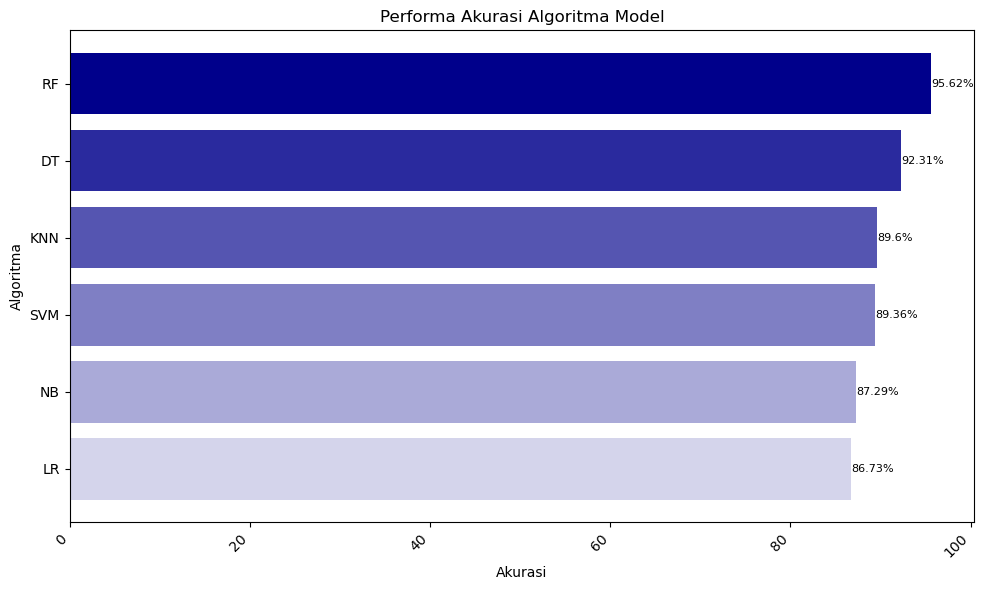

In [63]:
# visualisasi performa model menggunakan horizontal bar chart
model = final_model.Algoritma[0:6]
accuracy = final_model.Accuracy[0:6]
fig = plt.figure(figsize = (10,  6))

# urutkan data berdasarkan akurasi
sorted_data = sorted(zip(model, accuracy), key=lambda x: x[1])
sorted_model, sorted_accuracy = zip(*sorted_data)

num_bars = len(sorted_model)

# plotting
plt.xlabel('Akurasi')
plt.ylabel('Algoritma')
plt.title('Performa Akurasi Algoritma Model')
plt.xticks(rotation=45, ha='right', fontsize=10)

# plot horizontal bar
for i, (model, acc) in enumerate(zip(sorted_model, sorted_accuracy)):
    plt.barh(model, acc, color='darkblue', alpha=(i + 1) / num_bars)

# menambahkan nilai label di bar
for model, acc in zip(sorted_model, sorted_accuracy):
    plt.text(acc, model, f'{round(acc, 2)}%', va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()

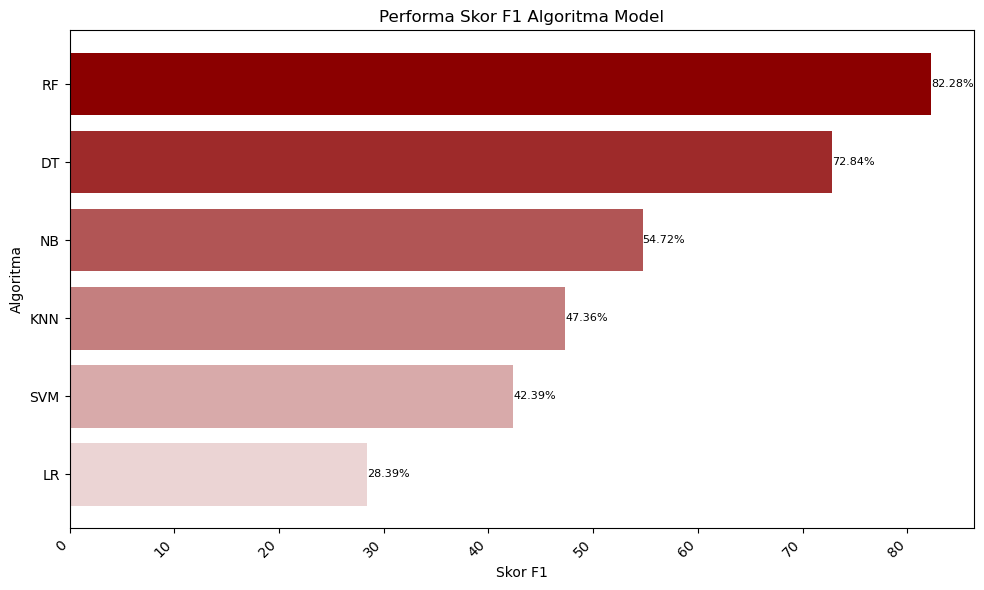

In [64]:
# visualisasi performa model menggunakan horizontal bar chart
model = final_model.Algoritma[0:6]
accuracy = final_model.F1_Score[0:6]
fig = plt.figure(figsize = (10,  6))

# urutkan data berdasarkan akurasi
sorted_data = sorted(zip(model, accuracy), key=lambda x: x[1])
sorted_model, sorted_accuracy = zip(*sorted_data)

num_bars = len(sorted_model)

# plotting
plt.xlabel('Skor F1')
plt.ylabel('Algoritma')
plt.title('Performa Skor F1 Algoritma Model')
plt.xticks(rotation=45, ha='right', fontsize=10)

# plot horizontal bar
for i, (model, acc) in enumerate(zip(sorted_model, sorted_accuracy)):
    plt.barh(model, acc, color='darkred', alpha=(i + 1) / num_bars)

# menambahkan nilai label di bar
for model, acc in zip(sorted_model, sorted_accuracy):
    plt.text(acc, model, f'{round(acc, 2)}%', va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()

### Prediksi

In [65]:
# membuat model dengan accuracy dan f1 score tertinggi (Random Forest)
clf = RandomForestClassifier()

# latih model
clf.fit(df_train_churn, target)


RandomForestClassifier()

In [66]:
# evaluasi model
df_test_churn = df_test_normal
prediction = clf.predict(df_test_churn)

In [67]:
# Menggabungkan data ID dengan hasil prediksi
df_test = pd.read_csv('Test.csv')
hasil_churn_rf = pd.DataFrame({
        "id": df_test["id"],
        "churn": prediction
    })
hasil_churn_rf.head(10)

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
5,6,no
6,7,no
7,8,no
8,9,no
9,10,yes


In [68]:
# simpan file ke dalam csv
hasil_churn_rf.to_csv('hasil_churn_rf.csv')

In [69]:
hasil_churn_rf = pd.read_csv('hasil_churn.csv')
hasil_churn_rf

,Unnamed: 0,id,churn
0,0,1,no
1,1,2,no
2,2,3,yes
3,3,4,no
4,4,5,no
...,...,...,...
745,745,746,no
746,746,747,no
747,747,748,no
748,748,749,no


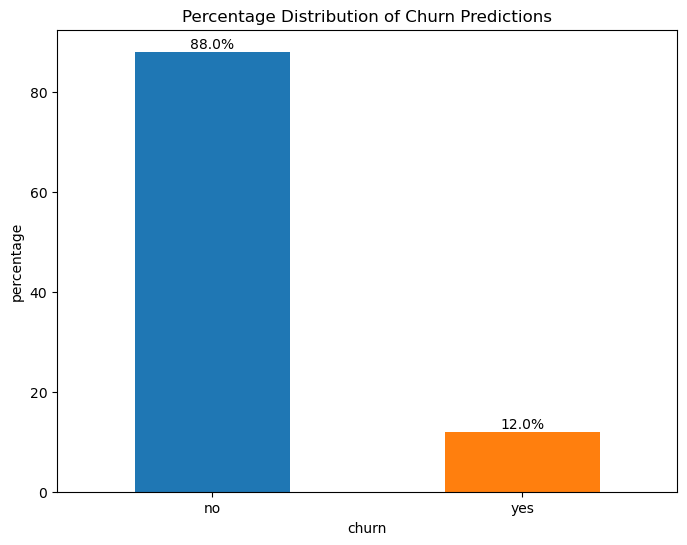

In [70]:
# melihat distribusi attribute dependent dari data test dalam hal ini churn menggunakan
def bar_churn(column, title):
    count = hasil_churn_rf[column].value_counts()
    # menghitung persentase
    percentages = count / count.sum() * 100

    # defenisi warna
    custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    # plot bar chart
    plt.figure(figsize=(8, 6))
    percentages.plot(kind='bar', color=custom_colors)
    plt.xlabel(column)
    plt.ylabel('percentage')
    plt.title(title)
    plt.xticks(rotation=0, ha='center')
    
    # menambahkan label pada bar chart
    for i, percentage in enumerate(percentages):
        plt.annotate(f'{percentage:.1f}%', xy=(i, percentage), ha='center', va='bottom')

    plt.show()
    plt.show()

bar_churn("churn", "Percentage Distribution of Churn Predictions")